In [1]:
from qiskit import *
from dotenv import load_dotenv
import os
from qiskit.tools.visualization import plot_histogram
# Load the API key from the .env file
load_dotenv()
IBM_TOKEN = os.getenv('IBM_TOKEN')
IBMQ.save_account(IBM_TOKEN)

IBMQ.load_account()

configrc.store_credentials:WARNING:2023-01-09 05:32:14,463: Credentials already present. Set overwrite=True to overwrite.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [2]:
# Create a Quantum Register with 2 qubits.
qr = QuantumRegister(2)
# Create a Classical Register with 2 bits.
cr = ClassicalRegister(2)
# Create a Quantum Circuit
circuit = QuantumCircuit(qr, cr)

circuit.h(qr[0])

circuit.cx(qr[0], qr[1])

circuit.measure(qr, cr)

circuit.draw()

┌───┐     ┌─┐   
q0_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q0_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c0: 2/═══════════╩══╩═
                 0  1

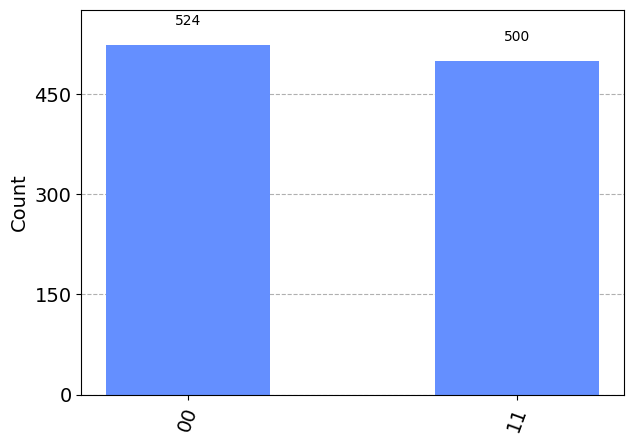

In [3]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots=1024).result()
plot_histogram(result.get_counts(circuit))

In [4]:
circuit.draw()

┌───┐     ┌─┐   
q0_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q0_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c0: 2/═══════════╩══╩═
                 0  1

In [5]:

# Create a Quantum Register with 2 qubits.
qr = QuantumRegister(2)
# Create a Classical Register with 2 bits.
cr = ClassicalRegister(2)
# Create a Quantum Circuit
circuit = QuantumCircuit(qr, cr)

circuit.h(qr[0])

circuit.cx(qr[0], qr[1])

circuit.measure(qr, cr)

circuit.draw()

┌───┐     ┌─┐   
q4_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q4_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c1: 2/═══════════╩══╩═
                 0  1

In [9]:
provider = IBMQ.get_provider(hub='ibm-q')
print(provider.backends())

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]


In [10]:
backend = provider.get_backend('ibmq_lima')

In [11]:
result = execute(circuit, backend, shots=1024).result()
plot_histogram(result.get_counts(circuit))